In [258]:
using Printf
import Random
import Statistics
import SpecialFunctions
import StatsBase
import FFTViews
import PyPlot

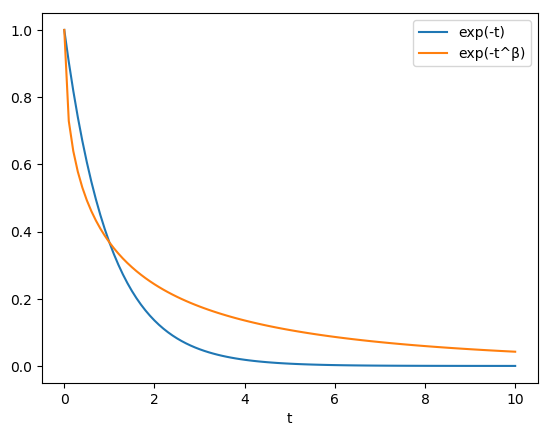

PyObject <matplotlib.legend.Legend object at 0x000000006A2EEC50>

In [270]:
γ = 0.5

x1 = [exp(-t) for t = 0:0.1:10]
x2 = [exp(-t^γ) for t = 0:0.1:10]

PyPlot.plot(0:0.1:10, x1, label="$exp(-t)")
PyPlot.plot(0:0.1:10, x2, label="exp(-t^β)")
PyPlot.xlabel("t")
PyPlot.legend(loc="upper right", fancybox="true")

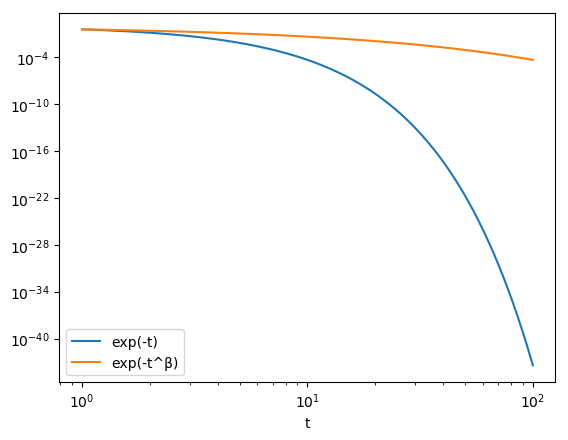

PyObject <matplotlib.legend.Legend object at 0x000000007FF9EDA0>

In [271]:
β = 0.5

x1 = [exp(-t) for t = 1:0.1:100]
x2 = [exp(-t^β) for t = 1:0.1:100]

PyPlot.loglog(1:0.1:100, x1, label="exp(-t)")
PyPlot.loglog(1:0.1:100, x2, label="exp(-t^β)")
PyPlot.xlabel("t")
PyPlot.legend(loc="lower left",fancybox="true")

In [259]:
noise = randn(10000000)

10000000-element Array{Float64,1}:
  0.8276403109427821 
  0.8718209241979665 
 -0.5332305874693574 
  0.6894656258186257 
 -0.5403671568333345 
 -2.3595584840954493 
 -0.7478212938676897 
 -1.3006810774546964 
 -0.40625575610351056
 -1.0981071821897386 
  0.587784430069222  
  1.6822441263006787 
 -1.131969266238382  
  ⋮                  
  3.118847691034992  
 -0.5992776902865661 
 -1.1081534502055197 
  0.04936189633126224
  0.4012623007844413 
  1.4469617062870508 
 -1.898661320641794  
  0.1765833007624145 
 -0.1281742384668185 
  0.09070176761763993
  2.0091483993240993 
 -0.6947198956262804 

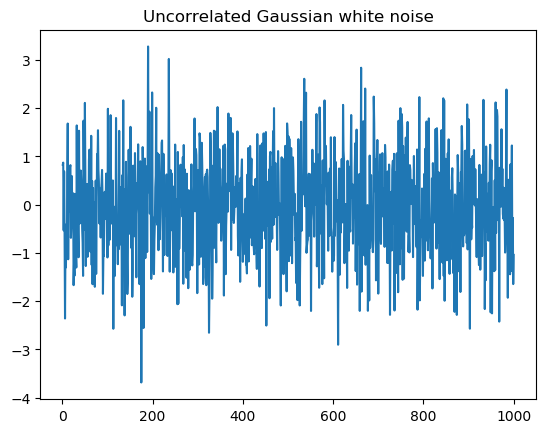

PyObject Text(0.5, 1.0, 'Uncorrelated Gaussian white noise')

In [260]:
PyPlot.plot(1:1000, noise[1:1000])
PyPlot.title("Uncorrelated Gaussian white noise")

In [261]:
noise_spectrum = FFTViews.fft(noise)

10000000-element Array{Complex{Float64},1}:
   2800.512997971895 + 0.0im               
 -6871.5205835007655 + 84.01838059694956im 
  -125.7268004359089 - 5801.9441587110205im
 -3472.8048768104954 + 1747.0123974340086im
 -1610.8271595036804 + 4389.905821021012im 
  480.73666837177393 - 2875.127047265533im 
 -1495.6028006910788 - 3502.8942376812im   
   2386.390560231024 - 2263.50607989313im  
  -1907.935416899159 - 2207.999031257221im 
  16.889163053049515 - 857.9208271055315im 
 -2514.4742579504423 + 961.5817058961702im 
   4483.384984639051 + 2256.471639007048im 
 -3854.3843471324894 + 1623.607335078117im 
                     ⋮                     
  -3854.384347132489 - 1623.6073350781169im
   4483.384984639051 - 2256.471639007046im 
  -2514.474257950444 - 961.5817058961711im 
  16.889163053049742 + 857.9208271055327im 
  -1907.935416899159 + 2207.9990312572195im
  2386.3905602310233 + 2263.506079893131im 
 -1495.6028006910788 + 3502.894237681201im 
   480.7366683717739 + 2875.1270

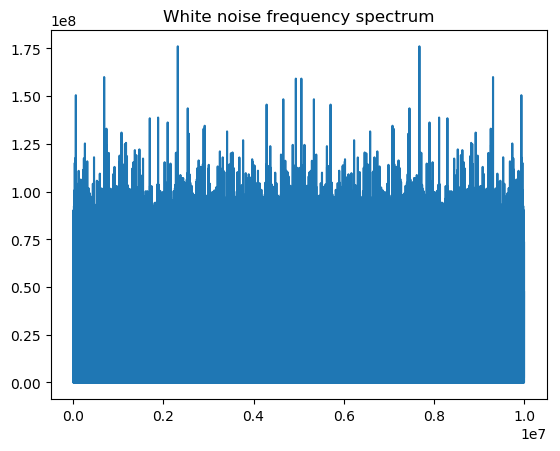

PyObject Text(0.5, 1.0, 'White noise frequency spectrum')

In [262]:
PyPlot.plot(1:10000000, real.(noise_spectrum.*conj(noise_spectrum)))
PyPlot.title("White noise frequency spectrum")

In [263]:
noise_autocor = StatsBase.autocor(noise, 0:100)

101-element Array{Float64,1}:
  1.0                   
 -0.00032532497114763355
  5.613655541895435e-5  
  0.0001891944932547579 
  0.00043598690909061764
 -0.00021981260647159135
 -9.624057025258852e-5  
  0.000784214747207548  
 -0.0002738363845507606 
  0.00011346620190730754
 -0.0003035649080862304 
  0.00015793485887005243
 -4.195051377609797e-5  
  ⋮                     
 -0.00024638679264488595
 -0.0006035767360030637 
 -0.00022163396723809157
  0.0007514423806726863 
 -0.00010431304551563308
  6.390903976779958e-5  
 -0.0002496988476038963 
  1.7096271455017012e-6 
  0.0002887527224030738 
  0.00012503501930064402
  0.0002764778643270804 
  0.00030057737664917784

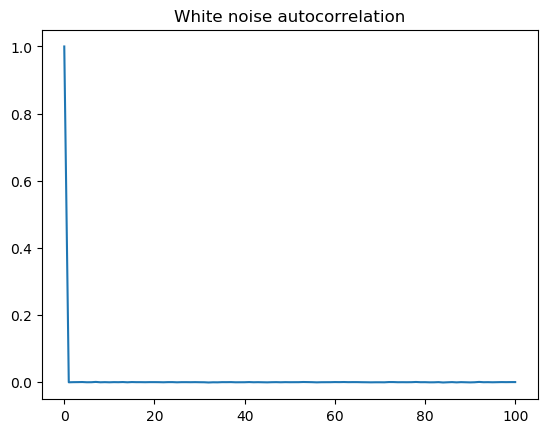

In [264]:
PyPlot.plot(0:100, noise_autocor);
PyPlot.title("White noise autocorrelation");

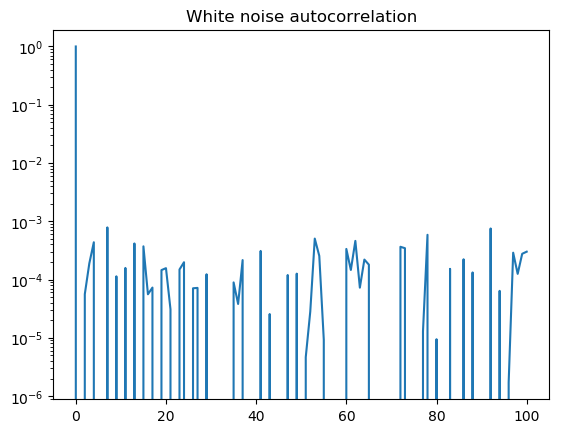

In [265]:
PyPlot.semilogy(0:100, noise_autocor);
PyPlot.title("White noise autocorrelation");

In [103]:
function return_times(series, q)
    times = Int64[]
    r = 0
    for i = 1:length(series)
        if series[i] ≤ q
            r = r+1
        else
            push!(times, r)
            r =0
        end
    end
    return times
end

return_times (generic function with 1 method)

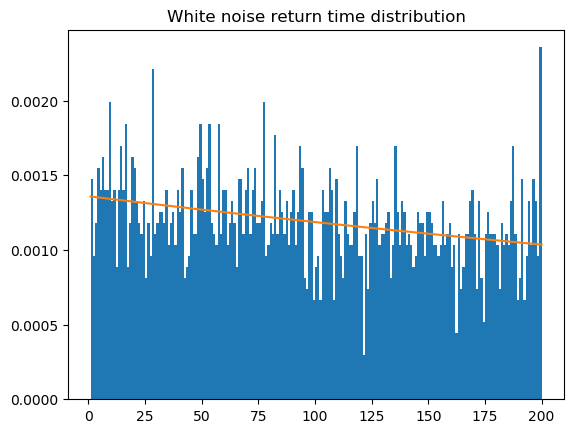

R_q = Statistics.mean(times) = 735.5931791396582


In [268]:
times = return_times(noise, 3);
weights = (1/length(times))*ones(length(times));

PyPlot.plt[:hist](times, bins=1:200, weights=weights, histtype="stepfilled");

@show R_q = Statistics.mean(times);

PyPlot.plot(1:200, [(1/R_q)*exp(-r/R_q) for r=1:200]);
PyPlot.title("White noise return time distribution");

In [239]:
u_i = rand(10000000)

10000000-element Array{Float64,1}:
 0.5914434906760877  
 0.09522076474678776 
 0.8954479262559145  
 0.2517397282906211  
 0.599320786276859   
 0.07795052744465591 
 0.9451972317645627  
 0.4054232197833896  
 0.6248405494182085  
 0.4689582640119554  
 0.9771877292721018  
 0.4473162965099762  
 0.7980684877923627  
 ⋮                   
 0.2623461116117023  
 0.49739028266049723 
 0.0263559681433585  
 0.0832677422272241  
 0.052640407161334446
 0.28366442855149887 
 0.6584835975252308  
 0.4840237908925147  
 0.5121100411111335  
 0.35422749886086224 
 0.5544159335557128  
 0.9798467800388806  

In [240]:
u_q = FFTViews.fft(u_i)

10000000-element Array{Complex{Float64},1}:
 4.998074705951014e6 + 0.0im               
   212.6445083954502 - 178.87162626760943im
   788.3216092203968 - 520.434788676069im  
  -643.5266134219287 - 931.2839386010666im 
  23.268228961873774 + 757.0730680437737im 
  -1415.815261266263 + 93.09422337261782im 
   -81.9778618090647 - 321.14280501096954im
  -272.0166870175058 + 44.22868788820034im 
   902.6772470184792 - 783.5977303288757im 
  -781.3392319467075 - 244.80253222620325im
 -42.631841813588494 - 1103.5004178719123im
  -816.6606083331264 + 814.5953101892056im 
  -601.1396441743699 + 325.2475639331366im 
                     ⋮                     
  -601.1396441743692 - 325.2475639331369im 
  -816.6606083331261 - 814.5953101892051im 
  -42.63184181358878 + 1103.5004178719123im
  -781.3392319467073 + 244.8025322262027im 
   902.6772470184787 + 783.5977303288755im 
 -272.01668701750543 - 44.2286878882004im  
  -81.97786180906485 + 321.1428050109697im 
  -1415.815261266263 - 93.094223

In [246]:
function S(β, q)
    return (2*√π / SpecialFunctions.gamma(β+1)) * (q/2)^β * SpecialFunctions.besselk(β, abs(q))
end

S (generic function with 1 method)

In [251]:
β = 0
L = length(η_i)
# η_q = [√S(β, (2*π/L) * ((i-1) - L/2)) * u_q[i] for i=1:L]
η_q = [√S(β, (2*π/L) * i) * u_q[i] for i=1:L]

1000000-element Array{Complex{Float64},1}:
 3.2725205389216572e7 + 0.0im               
   1351.8142547287455 - 1137.1147836340774im
    4921.557693647292 - 3249.117883224631im 
   -3964.682084825239 - 5737.516786794198im 
   141.85084697321292 + 4615.368711498617im 
    -8555.90057713214 + 562.5768709182291im 
  -491.67926821772335 - 1926.1207340213991im
  -1620.7069102434473 + 263.5196424063272im 
    5346.533288081169 - 4641.22848283382im  
   -4603.150531365965 - 1442.2197941977151im
  -249.93407428609007 - 6469.398076233727im 
   -4766.234986070361 + 4754.181391015356im 
  -3493.7573673513753 + 1890.3029998382065im
                      ⋮                     
   -73.20789465313001 + 2.86105531215241im  
   -48.41672032388046 - 42.81648366268492im 
    42.42422974572933 + 51.056801232759604im
   27.412575980046626 + 38.746708857866246im
   59.673619956578975 - 5.803024819220308im 
  -60.944642476740164 - 23.863617838472596im
    6.649903412976046 - 30.691031904532036im
  -36.456901

In [252]:
η_i = FFTViews.ifft(η_q)

1000000-element Array{Complex{Float64},1}:
  32.80540646127489 - 0.6714703921847552im  
  33.18019725988435 - 0.34022339082341707im 
  32.73150437823085 + 0.41730604552425693im 
 31.643897857096448 - 0.40517622192103725im 
  32.40225905004515 - 1.4384189457599468im  
 33.139614163880104 - 1.758317123699936im   
  33.78993430514764 - 0.8848487233420708im  
  33.68487083757957 - 0.7390314764041761im  
  34.27725713299747 - 0.2776280072821496im  
 33.452668291591934 + 0.4491421930517769im  
  33.12287613376201 + 0.026538577012557827im
  33.68098164422672 - 0.025286511416334933im
  32.97920088997125 + 0.4744921756071165im  
                    ⋮                       
 33.100468952852864 - 0.46114125218923285im 
 32.999738817466024 + 0.17024071265990118im 
 33.141655951981726 + 0.36417122183900635im 
  32.68876662670431 + 0.28064942381188274im 
  32.30200925210923 + 0.22210067733019992im 
 32.352890385166525 - 0.29338045333186513im 
 32.584807854089796 - 0.10062247768536874im 
   32.430858

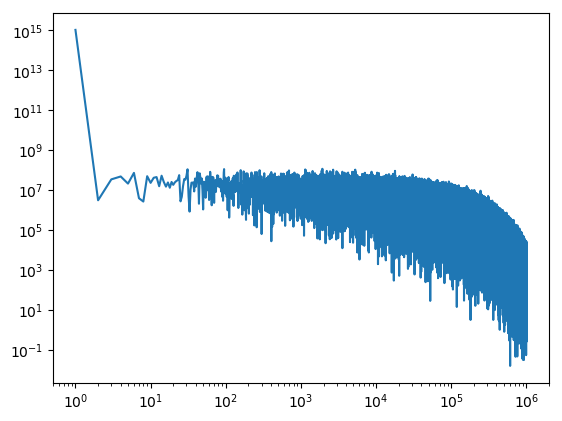

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000007FF96710>

In [253]:
PyPlot.loglog(1:1000000, real.(η_q.*conj(η_q)))

In [254]:
η_autocor = StatsBase.autocor(real.(η_i), 0:10000)

10001-element Array{Float64,1}:
  1.0                   
  0.7074390918655018    
  0.44747357639905777   
  0.31598419214299883   
  0.2419061445229459    
  0.1950570660300515    
  0.16346530128560394   
  0.14077705568513865   
  0.1236395680127844    
  0.11012297647294045   
  0.0989322348401207    
  0.08971225710923932   
  0.08170054570369792   
  ⋮                     
  6.159277883834304e-5  
 -0.00017384741469342517
 -0.0005182118643180528 
  9.965113423891808e-5  
  0.0010099689576459178 
  0.0008263237650451053 
  0.00019602860471139863
  0.0009229357155062076 
  0.0019354477026196587 
  0.0018695460107573767 
  0.001971090724070879  
  0.0013791915918797307 

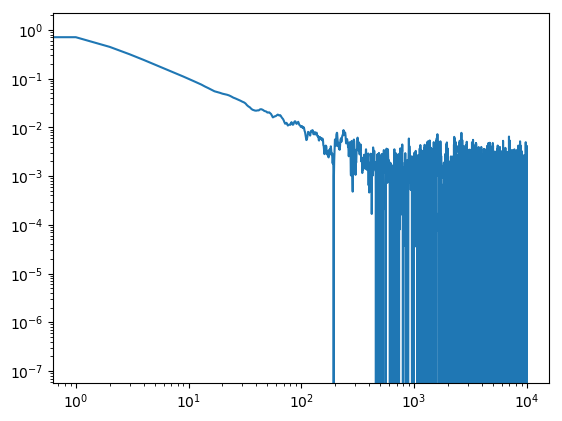

In [255]:
PyPlot.loglog(0:10000, η_autocor);

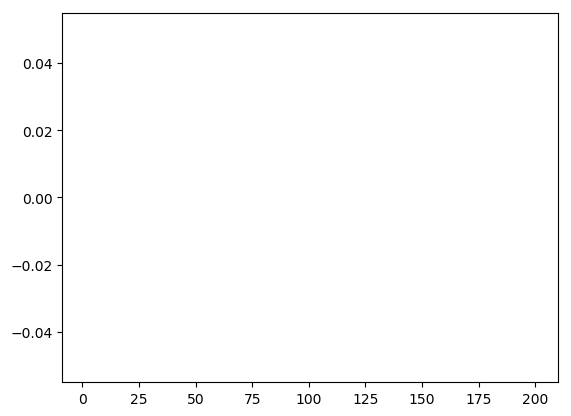

In [257]:
times = return_times(real.(η_i), 2);
weights = (1/length(times))*ones(length(times));

PyPlot.plt[:hist](times, bins=1:200, weights=weights, histtype="stepfilled");